In [36]:
from imports import *
from GAIAMdwarfs import *
import matplotlib.gridspec as gridspec
%matplotlib inline

In [126]:
# get data
self = loadpickle('input_data/GAIAMdwarfs_fullerrors_extraparams')

(None, <matplotlib.legend.Legend at 0x125a82810>)

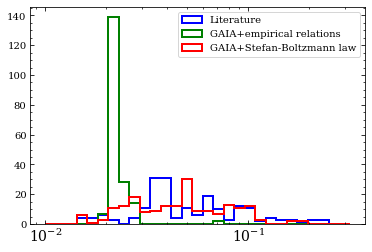

In [127]:
# fraction radius uncertainty
fbin = np.logspace(-2,-.5,30)
g = (np.isfinite(self.RsG)) & (np.isfinite(self.RsG_bol))
_=plt.hist(self.uRsN[g]/self.RsN[g], bins=fbin, histtype='step', lw=2, label='Literature')
_=plt.hist(self.eRsG[g]/self.RsG[g], bins=fbin, histtype='step', lw=2, label='GAIA+empirical relations')
_=plt.hist(self.uRsG_bol[g]/self.RsG_bol[g], bins=fbin, histtype='step', lw=2, label='GAIA+Stefan-Boltzmann law')
plt.xscale('log'), plt.legend(loc='upper right')

(Text(0.5,0,'GAIA+empirical relations'), Text(0,0.5,'GAIA+Stefan Boltzmann'))

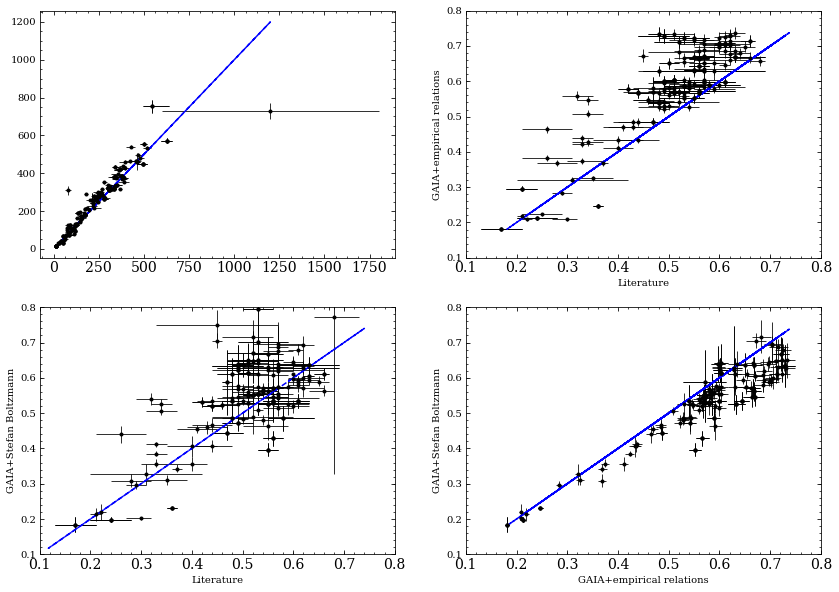

In [138]:
# compare distances and radii
plt.figure(figsize=(14,10)), plt.subplot(221)
plt.errorbar(self.distN, self.distG, xerr=[self.ldistN,self.udistN], yerr=[self.edistG,self.edistG], fmt='k.',
            elinewidth=.8), plt.plot(self.distN, self.distN, 'b--')#, plt.xscale('log'), plt.yscale('log')

plt.subplot(222)
plt.errorbar(self.RsN, self.RsG, xerr=[self.lRsN,self.uRsN], yerr=[self.eRsG,self.eRsG], fmt='k.',
            elinewidth=.8), plt.plot(self.RsG, self.RsG, 'b--'), plt.xlim((.1,.8)), plt.ylim((.1,.8))
plt.xlabel('Literature'), plt.ylabel('GAIA+empirical relations')

plt.subplot(223)
plt.errorbar(self.RsN, self.RsG_bol, xerr=[self.lRsN,self.uRsN], yerr=[self.lRsG_bol,self.uRsG_bol], fmt='k.',
            elinewidth=.8), plt.plot(self.RsN, self.RsN, 'b--'), plt.xlim((.1,.8)), plt.ylim((.1,.8))
plt.xlabel('Literature'), plt.ylabel('GAIA+Stefan Boltzmann')

plt.subplot(224)
plt.errorbar(self.RsG, self.RsG_bol, xerr=[self.eRsG,self.eRsG], yerr=[self.lRsG_bol,self.uRsG_bol], fmt='k.',
            elinewidth=.8), plt.plot(self.RsG, self.RsG, 'b--'), plt.xlim((.1,.8)), plt.ylim((.1,.8))
plt.xlabel('GAIA+empirical relations'), plt.ylabel('GAIA+Stefan Boltzmann')

(Text(0.5,0,'Literature'), Text(0,0.5,'GAIA+empirical relations'))

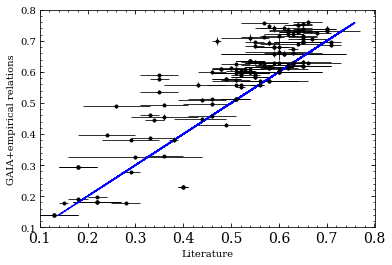

In [137]:
plt.errorbar(self.MsN, self.MsG, xerr=[self.lMsN,self.uMsN], yerr=[self.eMsG,self.eMsG], fmt='k.',
             elinewidth=.8), plt.plot(self.MsG, self.MsG, 'b--'), plt.xlim((.1,.8)), plt.ylim((.1,.8))
plt.xlabel('Literature'), plt.ylabel('GAIA+empirical relations')

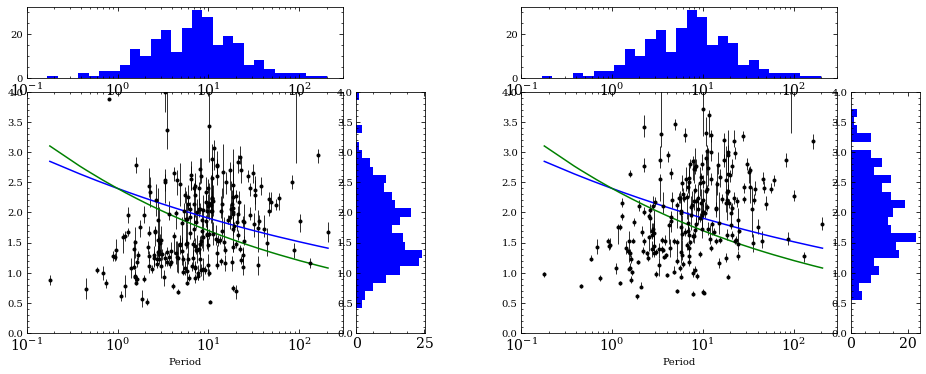

In [83]:
plt.figure(figsize=(16,6)), plt.subplot(121)
gs = gridspec.GridSpec(4,11)
ax1 = plt.subplot(gs[1:,:4])
ax2 = plt.subplot(gs[0,:4])
ax3 = plt.subplot(gs[1:,4])
ax4 = plt.subplot(gs[1:,6:10])
ax5 = plt.subplot(gs[0,6:10])
ax6 = plt.subplot(gs[1:,10])

# models
s = np.argsort(self.Ps)
vaneylen_model = 10**(-.1*np.log10(self.Ps) + .38)
lopez_rice_model = 10**(-.15*np.log10(self.Ps) + .38)

ax1.errorbar(self.Ps, self.rpsN_calc, yerr=[self.lrpsN_calc, self.urpsN_calc], fmt='k.', elinewidth=.8)
ax1.plot(self.Ps[s], vaneylen_model[s], 'b-', label='Van Eylen+2018')
ax1.plot(self.Ps[s], lopez_rice_model[s], 'g-', label='Lopez & Rice 2016')
ax1.set_ylim((0,4)), ax1.set_xlim((1e-1,3e2)), ax1.set_xscale('log'), ax1.set_xlabel('Period')
Pbins = np.logspace(-1,2.3,30)
_=ax2.hist(self.Ps, bins=Pbins), ax2.set_xlim((1e-1,3e2)), ax2.set_xscale('log')
rpbins = np.linspace(0,4,30)
_=ax3.hist(self.rpsN_calc, bins=rpbins, orientation='horizontal'), ax3.set_ylim((0,4))

ax4.errorbar(self.Ps, self.rpsG, yerr=[self.lrpsG, self.urpsG], fmt='k.', elinewidth=.8)
ax4.plot(self.Ps[s], vaneylen_model[s], 'b-', label='Van Eylen+2018')
ax4.plot(self.Ps[s], lopez_rice_model[s], 'g-', label='Lopez & Rice 2016')
ax4.set_ylim((0,4)), ax4.set_xlim((1e-1,3e2)), ax4.set_xscale('log'), ax4.set_xlabel('Period')
_=ax5.hist(self.Ps, bins=Pbins), ax5.set_xlim((1e-1,3e2)), ax5.set_xscale('log')
_=ax6.hist(self.rpsG[np.isfinite(self.rpsG)], bins=rpbins, orientation='horizontal'), ax6.set_ylim((0,4))

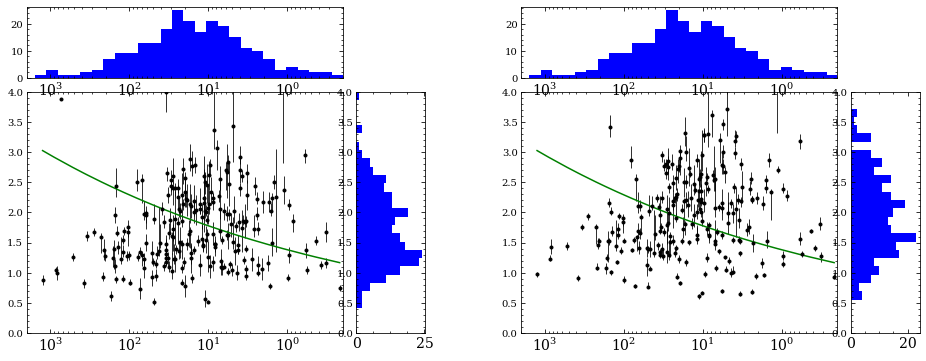

In [63]:
plt.figure(figsize=(16,6)), plt.subplot(121)
gs = gridspec.GridSpec(4,11)
ax1 = plt.subplot(gs[1:,:4])
ax2 = plt.subplot(gs[0,:4])
ax3 = plt.subplot(gs[1:,4])
ax4 = plt.subplot(gs[1:,6:10])
ax5 = plt.subplot(gs[0,6:10])
ax6 = plt.subplot(gs[1:,10])

# models
s = np.argsort(self.FG)
g = (np.isfinite(self.MsG))
lopez_rice_modelF = 10**(.11*np.log10(self.FG)+.14)

ax1.errorbar(self.FG, self.rpsN_calc, yerr=[self.lrpsN_calc, self.urpsN_calc], fmt='k.', elinewidth=.8)
ax1.plot(self.FG[s], lopez_rice_modelF[s], 'g-', label='Lopez & Rice 2016')
ax1.set_ylim((0,4)), ax1.set_xlim((2e3,.2)), ax1.set_xscale('log')
Fbins = np.logspace(-1,3.2,30)
_=ax2.hist(self.FG[g], bins=Fbins), ax2.set_xlim((2e3,.2)), ax2.set_xscale('log')
_=ax3.hist(self.rpsN_calc[g], bins=rpbins, orientation='horizontal'), ax3.set_ylim((0,4))

ax4.errorbar(self.FG, self.rpsG, yerr=[self.lrpsG, self.urpsG], fmt='k.', elinewidth=.8)
ax4.plot(self.FG[s], lopez_rice_modelF[s], 'g-', label='Lopez & Rice 2016')
ax4.set_ylim((0,4)), ax4.set_xlim((2e3,.2)), ax4.set_xscale('log')
_=ax5.hist(self.FG[g], bins=Fbins), ax5.set_xlim((2e3,.2)), ax5.set_xscale('log')
_=ax6.hist(self.rpsG[g], bins=rpbins, orientation='horizontal'), ax6.set_ylim((0,4))
#plt.figure(figsize=(16,5)), plt.subplot(121)
#plt.errorbar(self.FG, self.rpsN_calc, yerr=[self.lrpsN_calc, self.urpsN_calc], fmt='k.', elinewidth=.8)
#plt.ylim((0,4)), plt.xscale('log'), plt.xlim((self.FG[g].max(), self.FG[g].min())), plt.xlabel('Insolation')
#plt.subplot(122)
#plt.errorbar(self.FG, self.rpsG, yerr=[self.lrpsG, self.urpsG], fmt='k.', elinewidth=.8)
#plt.plot(self.FG, lopez_rice_model, 'k--', label='Lopez & Rice 2016')
#plt.ylim((0,4)), plt.xscale('log'), plt.xlim((self.FG[g].max(), self.FG[g].min())), plt.xlabel('Insolation')

/Users/ryancloutier/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


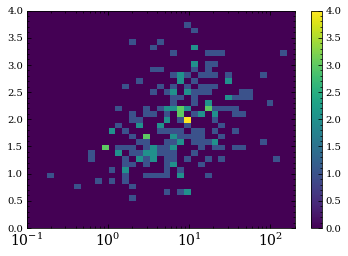

In [82]:
z,x,y = np.histogram2d(self.Ps, self.rpsG, bins=[Pbins, rpbins])
Pbins = np.logspace(-1,2.3,40)
rpbins = np.linspace(0,4,40)
plt.pcolormesh(x, y, z.T), plt.colorbar()
plt.xscale('log')

((array([ 0.,  1.,  4.,  3.,  4.,  9.,  9., 19., 30., 23., 23., 37., 25.,
         23., 12.,  4.,  0.,  3.,  1.,  1.,  2.,  1.,  0.,  0.,  3.,  2.,
          1.,  0.,  0.]),
  array([ 0.5       ,  0.56782362,  0.64484732,  0.73231908,  0.83165614,
          0.94446799,  1.07258246,  1.21807531,  1.38330386,  1.5709452 ,
          1.78403958,  2.02603961,  2.30086628,  2.61297243,  2.96741492,
          3.36993655,  3.82705913,  4.34618912,  4.93573765,  5.60525682,
          6.36559441,  7.2290697 ,  8.20967301,  9.32329246, 10.58797131,
         12.02420034, 13.65524988, 15.50754677, 17.61110262, 20.        ]),
  <a list of 29 Patch objects>),
 None)

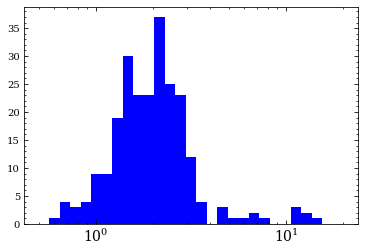

In [89]:
rpbins = np.logspace(np.log10(.5), np.log10(20),30)
g = np.isfinite(self.MsG)
plt.hist(self.rpsG[g], bins=rpbins), plt.xscale('log')

((0, 5), (0, 5))

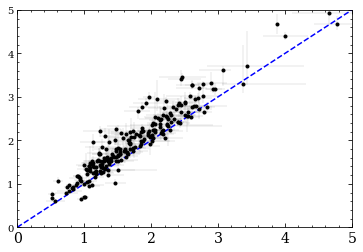

In [101]:
plt.errorbar(self.rpsN_calc, self.rpsG, xerr=[self.lrpsN_calc,self.urpsN_calc], 
             yerr=[self.lrpsG,self.urpsG], fmt='k.', elinewidth=.1)
plt.plot([0,5],[0,5],'b--')
plt.xlim((0,5)), plt.ylim((0,5))